In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.datasets import fetch_openml

### MNIST

In [3]:
mnist = fetch_openml('mnist_784', version=1)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X, y = mnist.data, mnist.target

In [6]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
digit = X[267].reshape(28,28)
digit_label = y[267]

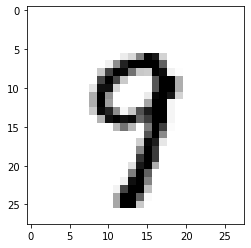

In [8]:
plt.imshow(digit, cmap='binary');

In [9]:
digit_label

'9'

In [10]:
y = y.astype(np.uint8)
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [11]:
print(X.shape)
print(y.shape)


(70000, 784)
(70000,)


In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] 

### Training a Binary Classifier

In [15]:
y_train_7 = (y_train == 7)
y_test_7 = (y_test == 7)

In [14]:
y_train_7

array([False, False, False, ..., False, False, False])

In [23]:
from sklearn.linear_model import SGDClassifier

In [35]:
# the same as linear SVM
sgd_svm_clf = SGDClassifier(loss="hinge", penalty="l2",  max_iter=5, random_state=42)

In [36]:
sgd_svm_clf.fit(X_train, y_train_7)

SGDClassifier(random_state=42)

Prediction:  False
Ground truth:  False


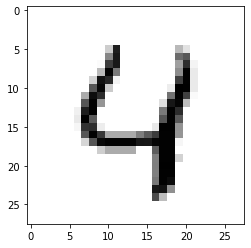

In [37]:
idx = 4
print("Prediction: ", sgd_svm_clf.predict([X_test[idx]])[0])
print("Ground truth: ", y_test_7[idx])
plt.imshow(X_test[idx].reshape(28,28), cmap="binary");

In [38]:
# the same as linear SVM
sgd_log_clf = SGDClassifier(loss="log", penalty="l2",  max_iter=5, random_state=42)

In [39]:
sgd_log_clf.fit(X_trainain, y_train_7)

/home/qnarik/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(loss='log', max_iter=5, random_state=42)

Prediction:  False
Ground truth:  False


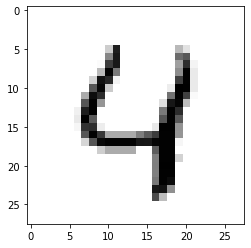

In [40]:
idx = 4
print("Prediction: ", sgd_log_clf.predict([X_test[idx]])[0])
print("Ground truth: ", y_test_7[idx])
plt.imshow(X_test[idx].reshape(28,28), cmap="binary");

## Performance Measures

### Measuring Accuracy Using Cross-Validation

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
cross_val_score(sgd_svm_clf, X_train, y_train_7, cv=3, scoring='accuracy')

array([0.98105, 0.9735 , 0.95335])

In [43]:
cross_val_score(sgd_log_clf, X_train, y_train_7, cv=3, scoring='accuracy')

/home/qnarik/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/qnarik/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/qnarik/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.9804, 0.9808, 0.9822])

In [45]:
# check for untrained clfs
sgd_svm_clf_new = SGDClassifier(loss="hinge", penalty="l2",  max_iter=5, random_state=42)
sgd_log_clf_new = SGDClassifier(loss="log", penalty="l2",  max_iter=5, random_state=42)

In [46]:
cross_val_score(sgd_svm_clf_new, X_train, y_train_7, cv=3, scoring='accuracy')

/home/qnarik/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/qnarik/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/qnarik/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.9735 , 0.9771 , 0.96525])

In [47]:
cross_val_score(sgd_log_clf_new, X_train, y_train_7, cv=3, scoring='accuracy')

/home/qnarik/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/qnarik/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/qnarik/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.9804, 0.9808, 0.9822])

In [48]:
from sklearn.base import BaseEstimator

In [52]:
class RandClf(BaseEstimator):
    def fit(self, X, y=None):
        return self

    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [53]:
randClf = RandClf()

In [56]:
cross_val_score(randClf, X_train, y_train_7, cv=3, scoring='accuracy')

array([0.89535, 0.8984 , 0.893  ])

accuracy is about 0.9, here we have unbalanced dataset that's why we will be right in 9 times out of 10 

### Confusion Matrix

In [57]:
from sklearn.model_selection import cross_val_predict

In [58]:
y_train_pred = cross_val_predict(sgd_log_clf_new, X_train, y_train_7, cv=3)

/home/qnarik/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/qnarik/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/qnarik/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [59]:
y_train_pred

array([False, False, False, ..., False, False, False])

In [72]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

In [61]:
confusion_matrix(y_train_7, y_train_pred)

array([[53290,   445],
       [  687,  5578]], dtype=int64)

In [70]:
# when it claims that the image is '7' it corrects 93% of the time
precision_score(y_train_7, y_train_pred)

0.9261165532126847

In [71]:
# it only detects 89% of all '7'
recall_score(y_train_7, y_train_pred)

0.8903431763766959

In [67]:
accuracy_score(y_train_7, y_train_pred)

0.9811333333333333

In [73]:
f1_score(y_train_7, y_train_pred)

0.9078776041666667